# Basic Image Processing in Python

We will briefly talk about how to do basic image processing in Python using scikit-image package. You can click here for more information about scikit-image: <https://scikit-image.org/docs/stable/user_guide.html>. 

scikit-image is an image processing toolbox for SciPy. You can also click here for another tutorial on image processing:<http://scipy-lectures.org/advanced/image_processing/index.html>

<img src="https://scikit-image.org/docs/stable/_static/img/logo.png"
     style="float: left; margin-right: 10px;" />
    


## Some Basics on Image Storage


Check here for a brief intro to image storage on pixel and pixel values...
<https://www.whydomath.org/node/wavlets/imagebasics.html>


## Get Started

Let us install the pakage:

scikit-image comes pre-installed with several Python distributions, including Anaconda.

On all major operating systems, install it via shell/command prompt:

`pip install scikit-image`

If this does not work, try this
`pip install -U scikit-image`

If you are running Anaconda or miniconda, use:

`conda install -c conda-forge scikit-image`

Note that scikit-image is an image processing Python package that works with numpy arrays. The package is imported as skimage:

In [1]:
import skimage

Most functions of skimage are found within submodules. You can click here for more info on those modules.
<https://scikit-image.org/docs/stable/api/api.html>

Let us import the data set from skimage for an example. The skimage.data submodule provides a set of functions returning example images, that can be used to get started quickly on using scikit-image’s functions.

Note that within scikit-image, images are represented as NumPy arrays, for example 2-D arrays for grayscale 2-D images

In [2]:
from skimage import data
camera = data.camera()

In [3]:
type(camera)

numpy.ndarray

In [4]:
# An image with 512 rows and 512 columns
camera.shape

(512, 512)

Of course, it is also possible to load your own images as NumPy arrays from image files, using skimage.io.imread():

In [5]:
import os
cwd=os.getcwd()
filename = os.path.join(cwd, 'benson.JPG')
from skimage import io
benson = io.imread(filename)
type(benson)

numpy.ndarray

Let us plot this image

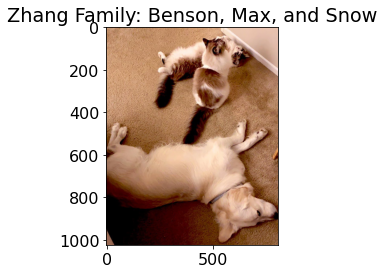

In [6]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 16

plt.figure()
plt.title("Zhang Family: Benson, Max, and Snow")
plt.imshow(benson)
plt.show()

You can use natsort to load multiple images <https://pypi.org/project/natsort/>

if you use `pip install natsort` to install this package.

The documentation is here: <https://natsort.readthedocs.io/en/master/>

In [8]:
!pip3 install natsort

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [9]:
import os
from natsort import natsorted, ns
from skimage import io
import glob
list_files = glob.glob('*JPG')
list_files
list_files = natsorted(list_files)
list_files
image_list = []
for filename in list_files:
      image_list.append(io.imread(filename))

In [10]:
image_list

[array([[[203, 164, 133],
         [203, 164, 133],
         [199, 160, 129],
         ...,
         [233, 196, 177],
         [233, 196, 177],
         [233, 196, 177]],
 
        [[192, 153, 122],
         [198, 159, 128],
         [203, 162, 132],
         ...,
         [233, 196, 177],
         [233, 196, 177],
         [233, 196, 177]],
 
        [[194, 153, 123],
         [198, 157, 127],
         [201, 160, 130],
         ...,
         [233, 196, 177],
         [233, 196, 177],
         [233, 196, 177]],
 
        ...,
 
        [[153, 107,  84],
         [153, 107,  84],
         [153, 107,  84],
         ...,
         [152, 106,  70],
         [144,  98,  62],
         [138,  94,  57]],
 
        [[153, 107,  84],
         [153, 107,  84],
         [153, 107,  84],
         ...,
         [149, 103,  67],
         [140,  96,  59],
         [133,  89,  52]],
 
        [[153, 107,  84],
         [153, 107,  84],
         [153, 107,  84],
         ...,
         [147, 102,  63],
  

Let us plot them all...

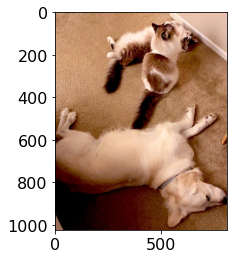

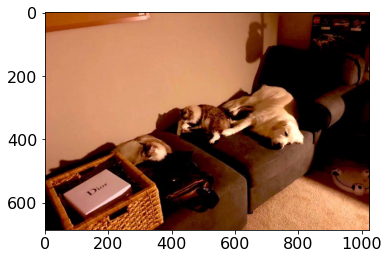

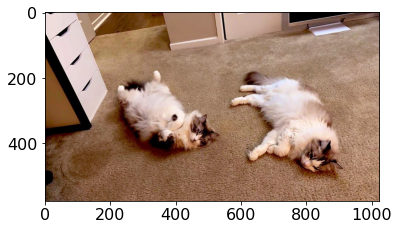

In [11]:

for image in image_list:
    plt.figure()
    plt.imshow(image)

plt.show()

## A crash course on NumPy for images

Images in scikit-image are represented by NumPy ndarrays. Hence, many common operations can be achieved using standard NumPy methods for manipulating arrays. Let us get some basic ideas of numpy first.

You can click here for more details about numpy <https://numpy.org/devdocs/user/quickstart.html>

or <https://cs231n.github.io/python-numpy-tutorial/>

Disclosure: this part of tutorial relies heavily on <https://numpy.org/devdocs/user/quickstart.html>. You can click here for your reference.

### The Basics
NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

For example, the coordinates of a point in 3D space [1, 2, 1] has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

[[ 1., 0., 0.],
 [ 0., 1., 2.]]
 
NumPy’s array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:

`ndarray.ndim`
the number of axes (dimensions) of the array.

`ndarray.shape`
the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.

`ndarray.size`
the total number of elements of the array. This is equal to the product of the elements of shape.

`ndarray.dtype`
an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

In [12]:
# let us see benson's dimension
benson.ndim

3

In [49]:
benson.shape

(1024, 809, 3)

In [50]:
benson.size

2485248

In [51]:
benson.dtype

dtype('uint8')

### Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [52]:
import numpy as np
a = np.array([2,3,4])
a

array([2, 3, 4])

In [53]:
a.dtype

dtype('int64')

In [54]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

In [13]:
#A frequent error consists in calling array with multiple arguments, rather than providing a single sequence as an argument.
a = np.array(1,2,3,4)    # WRONG

NameError: name 'np' is not defined

In [56]:
a = np.array([1,2,3,4])  # RIGHT
# array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [57]:
#The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.
np.zeros((3, 4))                                # uninitialized

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [58]:
np.ones( (2,3,4), dtype=np.int16 )                # dtype can also be specified

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [59]:
np.empty( (2,3) ) 

array([[   0.,  200.,  400.],
       [ 600.,  800., 1000.]])

In [60]:
#To create sequences of numbers, NumPy provides the arange function which is analogous to the Python built-in range, but returns an array.
np.arange( 10, 30, 5 )

array([10, 15, 20, 25])

In [61]:
from numpy import pi
np.linspace( 0, 2, 9 )                 # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

### Basic Operations

Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [62]:
a = np.array( [20,30,40,50] )
a

array([20, 30, 40, 50])

In [63]:
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [64]:
c = a-b
c

array([20, 29, 38, 47])

In [65]:
b**2

array([0, 1, 4, 9])

In [66]:
a<35

array([ True,  True, False, False])

`Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the @ operator (in python >=3.5) or the dot function or method:`

In [67]:
A = np.array( [[1,1],
             [0,1]] )
B = np.array( [[2,0],
               [3,4]] )
A * B                       # elementwise product

array([[2, 0],
       [0, 4]])

In [68]:
A @ B                       # matrix product

array([[5, 4],
       [3, 4]])

In [69]:
A.dot(B)                    # another matrix product

array([[5, 4],
       [3, 4]])

You can also reshape numpy array like this:

In [70]:
b = np.arange(12)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [71]:
b.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Numpy with Skimage

In [14]:
from skimage import data
camera = data.camera()
type(camera)

numpy.ndarray

In [73]:
camera.shape

(512, 512)

In [74]:
camera.min(), camera.max()

(0, 255)

In [75]:
camera.mean()

118.31400299072266

`NumPy arrays representing images can be of different integer or float numerical types.`  See Image data types and what they mean for more information about these types and how scikit-image treats them.<https://scikit-image.org/docs/stable/user_guide/data_types.html#data-types>

Image data types and what they mean
In skimage, images are simply numpy arrays, which support a variety of data types 1, i.e. “dtypes”. To avoid distorting image intensities (see Rescaling intensity values), we assume that images use the following dtype ranges:

**Data type   Range**

uint8:    0 to 255

uint16:   0 to 65535

uint32:   0 to $2^{32}$ - 1

float:    -1 to 1 or 0 to 1

int8:     -128 to 127

int16:    -32768 to 32767

int32:    -$2^{31}$ to $2^{31}$ - 1

Note that float images should be restricted to the range -1 to 1 even though the data type itself can exceed this range; all integer dtypes, on the other hand, have pixel intensities that can span the entire data type range. With a few exceptions, 64-bit (u)int images are not supported.

Functions in skimage are designed so that they accept any of these dtypes, but, for efficiency, may return an image of a different dtype (see Output types). If you need a particular dtype, skimage provides utility functions that convert dtypes and properly rescale image intensities (see Input types). You should never use astype on an image, because it violates these assumptions about the dtype range:

The following utility functions in the main package are available to developers and users:

**Function name     Description**

img_as_float:    Convert to 64-bit floating point.

img_as_ubyte:    Convert to 8-bit uint.

img_as_uint:     Convert to 16-bit uint.

img_as_int:      Convert to 16-bit int.

These functions convert images to the desired dtype and properly rescale their values:

### NumPy indexing

NumPy indexing can be used both for looking at the pixel values and to modify them:

In [76]:
# Get the value of the pixel at the 10th row and 20th column
benson[10, 20]

array([202, 156, 122], dtype=uint8)

In [77]:
# Set to black the pixel at the 3rd row and 10th column
benson[3, 10] = 0

`Be careful! In NumPy indexing, the first dimension (camera.shape[0]) corresponds to rows, while the second (camera.shape[1]) corresponds to columns, with the origin (camera[0, 0]) at the top-left corner.` 

### Rescale, resize, and downscale

`Rescale` operation resizes an image by a given scaling factor. The scaling
factor can either be a single floating point value, or multiple values - one
along each axis.

`Resize` serves the same purpose, but allows to specify an output image shape
instead of a scaling factor.

`Downscale` serves the purpose of down-sampling an n-dimensional image by
integer factors using the local mean on the elements of each block of the size
factors given as a parameter to the function.


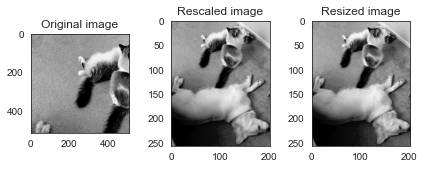

In [78]:
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 10
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(benson)

image_rescaled = rescale(image, 0.25)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4))

fig, axes = plt.subplots(nrows=1, ncols=3)

ax = axes.ravel()
# check here for ravel function-it returns a contiguous flattened array.
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

## Some Basics of Neural Network

In the lecture, we use logistic regression as an example to showcase how we use gradient descent to compute the weights and biases. Here let us use numpy to implement gradient descent...

Disclosure: this part of codes is adapted from <https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html>

In [79]:
import numpy as np # check here for numpy tutorial <https://numpy.org/devdocs/user/absolute_beginners.html>
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

Let create a fake dataset for our classification task

In [80]:
features, labels = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=2020)
# Josh' comments: Generate a random n-class classification problem.
# This initially creates clusters of points normally distributed (std=1) about vertices of 
# an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number 
# of clusters to each class. It introduces interdependence between these features and 
# adds various types of further noise to the data.

In [81]:
features

array([[ 1.05051896, -1.91803393],
       [ 0.3301913 , -2.04293774],
       [ 1.79117866, -3.10849906],
       ...,
       [-0.3926355 , -2.07746983],
       [ 0.21370577,  1.40554183],
       [ 0.08462641, -1.83679819]])

In [82]:
features.ndim

2

In [83]:
labels

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [84]:
labels.ndim

1

In [85]:
type(labels)

numpy.ndarray

In [86]:
features.shape,labels.shape

((1000, 2), (1000,))

In [87]:
labels = labels[:,np.newaxis]
# Josh' comments: numpy.newaxis is used to increase the dimension of the existing array by one more dimension
# When you read data, you should notice that lables are rank 1 arrays. rank 1 array will have a shape of (m, ) 
# where as rank 2 arrays will have a shape of (m,1). When operating on arrays its good to 
# convert rank 1 arrays to rank 2 arrays because rank 1 arrays often give unexpected results.
# To convert rank 1 to rank 2 array we use someArray[:,np.newaxis]

In [88]:
labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [89]:
labels.ndim

2

<AxesSubplot:>

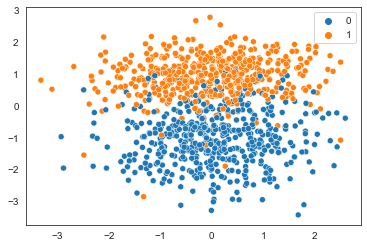

In [90]:
# Let us plot the data feature 1 by feature 2 grouped by labels..
sns.set_style('white')
sns.scatterplot(x=features[:,0],y=features[:,1],hue=labels.reshape(-1))
# you can click here to see parameters for scatterplot function <https://seaborn.pydata.org/generated/seaborn.scatterplot.html>

In [91]:
type(features)

numpy.ndarray

In [92]:
features.ndim, features.size

(2, 2000)

In [93]:
labels.ndim, labels.size

(2, 1000)

In [94]:
features.shape,labels.shape

((1000, 2), (1000, 1))

####  Logistic regression 
#### $$ h_{\theta}(x) = {\sigma}(\theta^{T}x)$$


As we mentioned in the lecture, the activation funtion in logistic regression is the sigmoid function:

#### $$ {\sigma}(z)=\frac{1}{1+e^{−z}} $$

The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

You can see the distribution here:

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/sigmoid.png"
     style="float: left; margin-right: 10px;" />

In [95]:
# let us define sigmoid function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

We need to write a prediction function. `A prediction function in logistic regression returns the probability of our observation being positive, True, or “Yes”. We call this class 1 and its notation is 𝑃(𝑐𝑙𝑎𝑠𝑠=1). As the probability gets closer to 1, our model is more confident that the observation is in class 1.`

let us define $$z = \theta^{T}x$$ and ignore the biases in this tutorial

In [96]:
# let us define a prediction function
def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)

We need to define a cost function. 

`we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for 𝑦=1 and one for 𝑦=0.`

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/ng_cost_function_logistic.png"
     style="float: left; margin-right: 10px;" />

Then let us combine these two components together:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

Josh notes: **I strongly suggest you to watch the lecture by Andrew NG ON COURERA regarding neural network basics and deep learning. Very intuitive.**

Here is the vectorized version:

#### $$ J(\theta) = - \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$


In [97]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(1000,2)
    Labels: (1000,1)
    Weights:(2,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

# Josh' comments: you can write a vectorized version of cost function
#  J = -1*(1/m)*(np.log(predictions).T.dot(labels)+np.log(1-predictions).T.dot(1-labels))

`To minimize our cost, we use Gradient Descent just like before in Linear Regression. There are other more sophisticated optimization algorithms out there such as conjugate gradient like BFGS, but you don’t have to worry about these. Machine learning libraries like Scikit-learn have their implementations so you can focus on more interesting things!`

The basic idea of gradient descent is that in order to minize the cost function, you slightly nudge your weights, and see how it influences your cost... and then update your weights....

#### $$ weights := weights - {learningrate} * slope $$


#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


Repeat {

  1. Calculate gradient average
  2. Multiply by learning rate
  3. Subtract from weights

}

In [98]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (1000, 2) to (2, 1000)
    # So we can multiply w the (1000,1)  cost matrix.
    # Returns a (2,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

Time to train our model

In [99]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

In [100]:
lr = .01
iters = 10000
weights = np.zeros((features.ndim,1)) # we initinize our weights as zeros-- this is not wise but works fine for logistic
weights, cost_history = train(features,labels,weights,lr, iters)

iter: 0 cost: 0.6907503026719932
iter: 1000 cost: 0.28088507867909307
iter: 2000 cost: 0.25411236531525416
iter: 3000 cost: 0.2465118640785795
iter: 4000 cost: 0.24352972366738543
iter: 5000 cost: 0.24217536305489692
iter: 6000 cost: 0.24150773465410777
iter: 7000 cost: 0.2411613741647257
iter: 8000 cost: 0.24097548263143564
iter: 9000 cost: 0.24087334554935125


In [101]:
cost_history

[0.6907503026719932,
 0.6883715331699282,
 0.6860107342960196,
 0.6836677686606087,
 0.6813424992628532,
 0.6790347895109066,
 0.6767445032415437,
 0.6744715047392255,
 0.6722156587546094,
 0.6699768305225076,
 0.6677548857792945,
 0.6655496907797687,
 0.6633611123134704,
 0.6611890177204629,
 0.6590332749065771,
 0.6568937523581287,
 0.6547703191561088,
 0.652662844989858,
 0.650571200170225,
 0.6484952556422198,
 0.646434882997163,
 0.6443899544843443,
 0.6423603430221884,
 0.6403459222089428,
 0.6383465663328908,
 0.636362150382096,
 0.6343925500536886,
 0.632437641762699,
 0.6304973026504475,
 0.6285714105924949,
 0.6266598442061684,
 0.6247624828576617,
 0.6228792066687259,
 0.6210098965229536,
 0.6191544340716669,
 0.6173127017394169,
 0.6154845827291028,
 0.6136699610267186,
 0.6118687214057368,
 0.6100807494311364,
 0.6083059314630828,
 0.6065441546602697,
 0.6047953069829304,
 0.6030592771955239,
 0.6013359548691117,
 0.5996252303834226,
 0.5979269949286224,
 0.596241140506793

We need to evalute our model

`If our model is working, we should see our cost decrease after every iteration.`

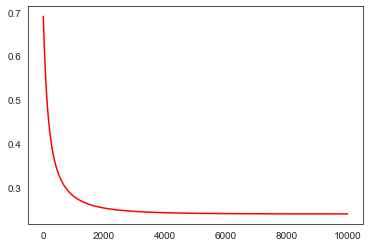

In [102]:
plt.plot(list(range(iters)), cost_history, '-r') 

We can also compute the accuracy

`Accuracy measures how correct our predictions were. In this case we simply compare predicted labels to true labels and divide by the total.`

Let us Map probabilities to classes

`The final step is assign class labels (0 or 1) to our predicted probabilities.`

In [103]:
# set up decision boundary
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

# Convert probabilities to classes
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  vec_decision_boundary = np.vectorize(decision_boundary)
  return vec_decision_boundary(predictions).flatten()

In [104]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

pred_prob = predict(features,weights)
predicted_labels = classify(pred_prob)
predicted_labels.ndim
accuracy(predicted_labels,labels.flatten())

0.917